In [1]:
#Importing libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import pickle

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
df = pd.read_csv('bodyfat.csv')

In [3]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [5]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


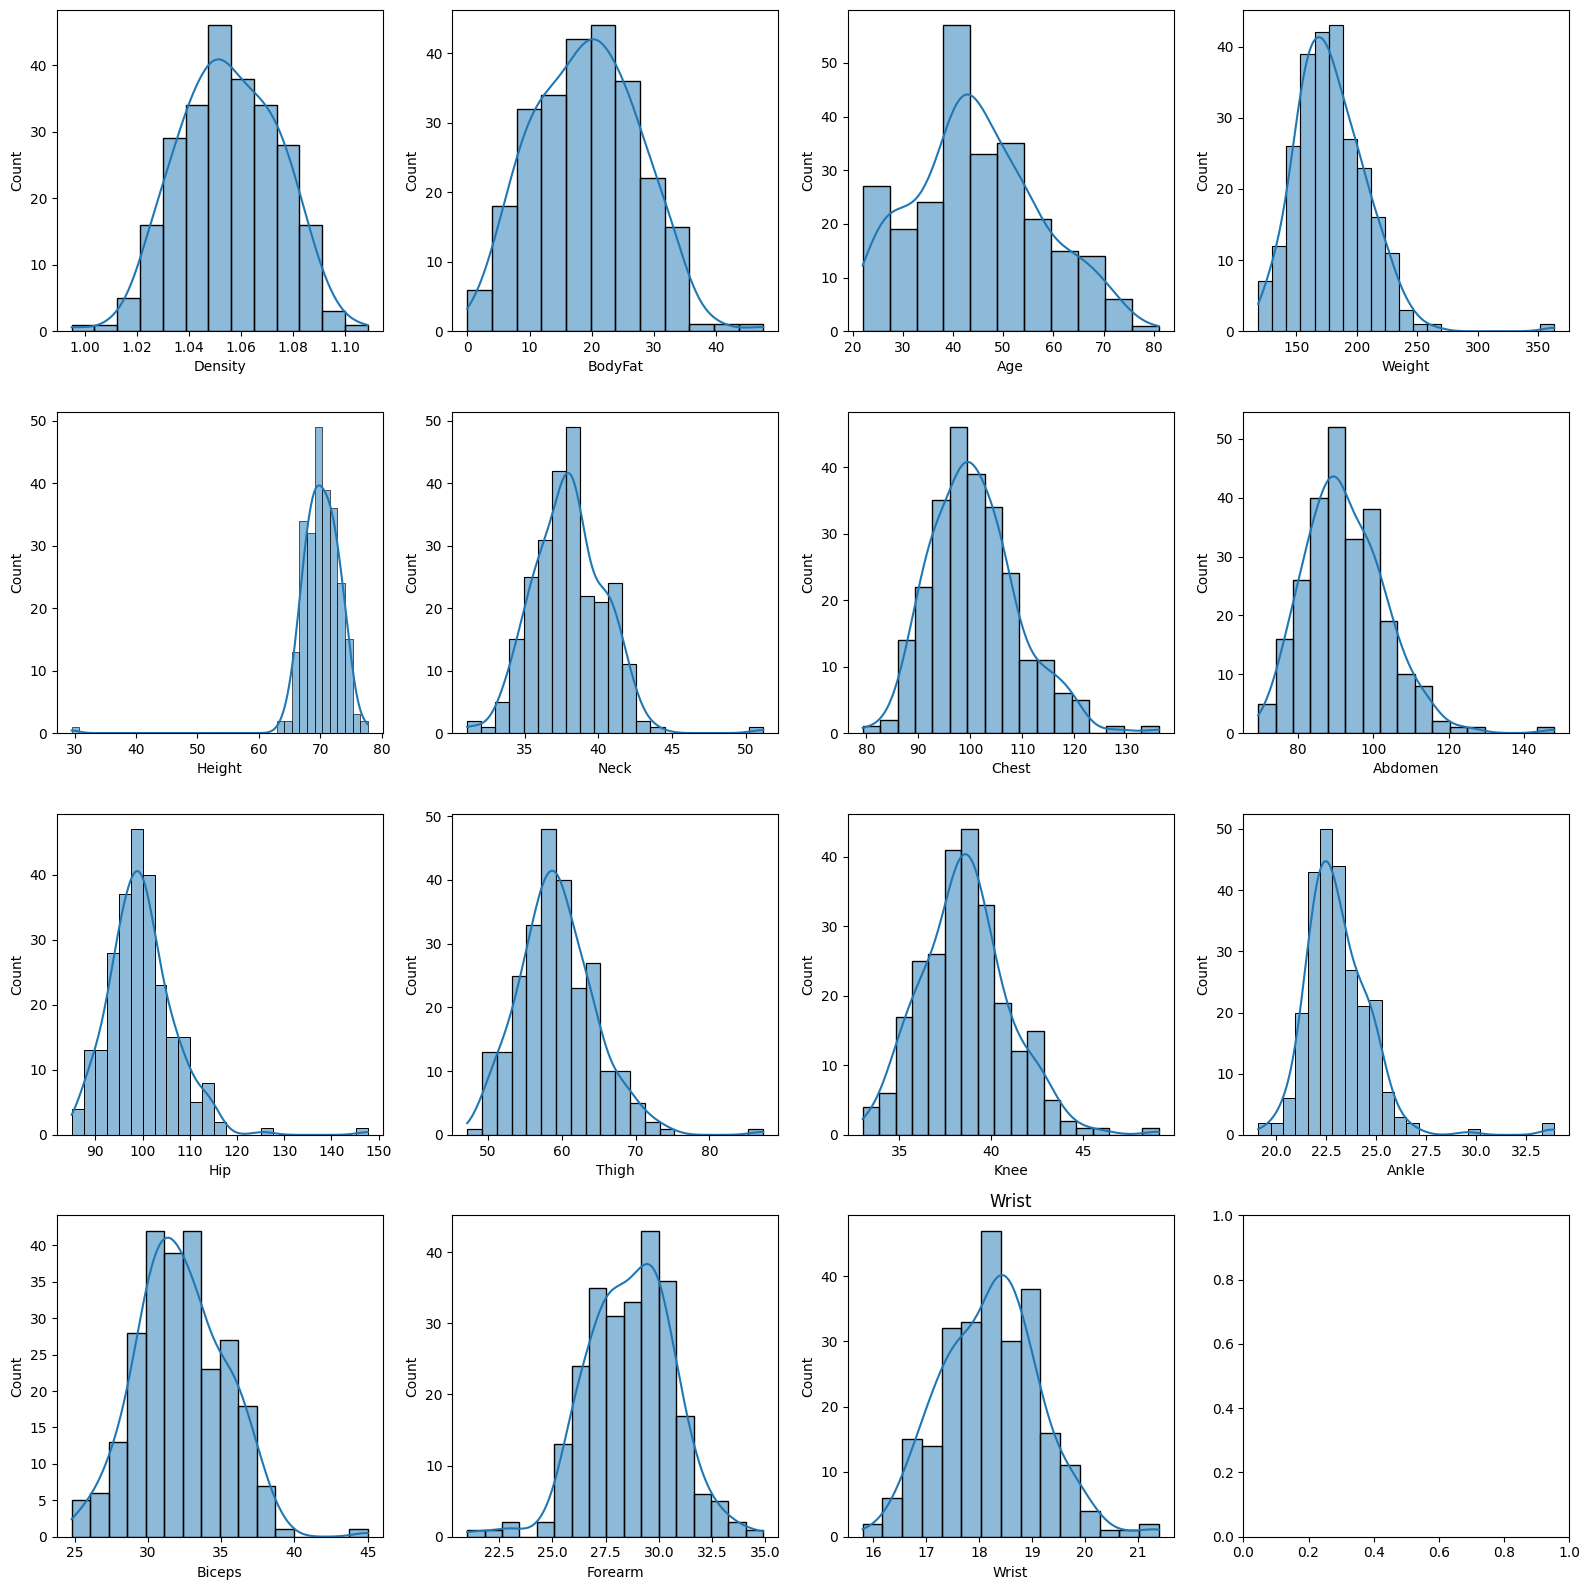

In [6]:
# histgram plot
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axs = axs. flatten()
for i, column in enumerate(df.columns):
  sns.histplot(df[column], kde=True, ax=axs[i])
axs[i].set_title(column)
plt.tight_layout()
plt.show()

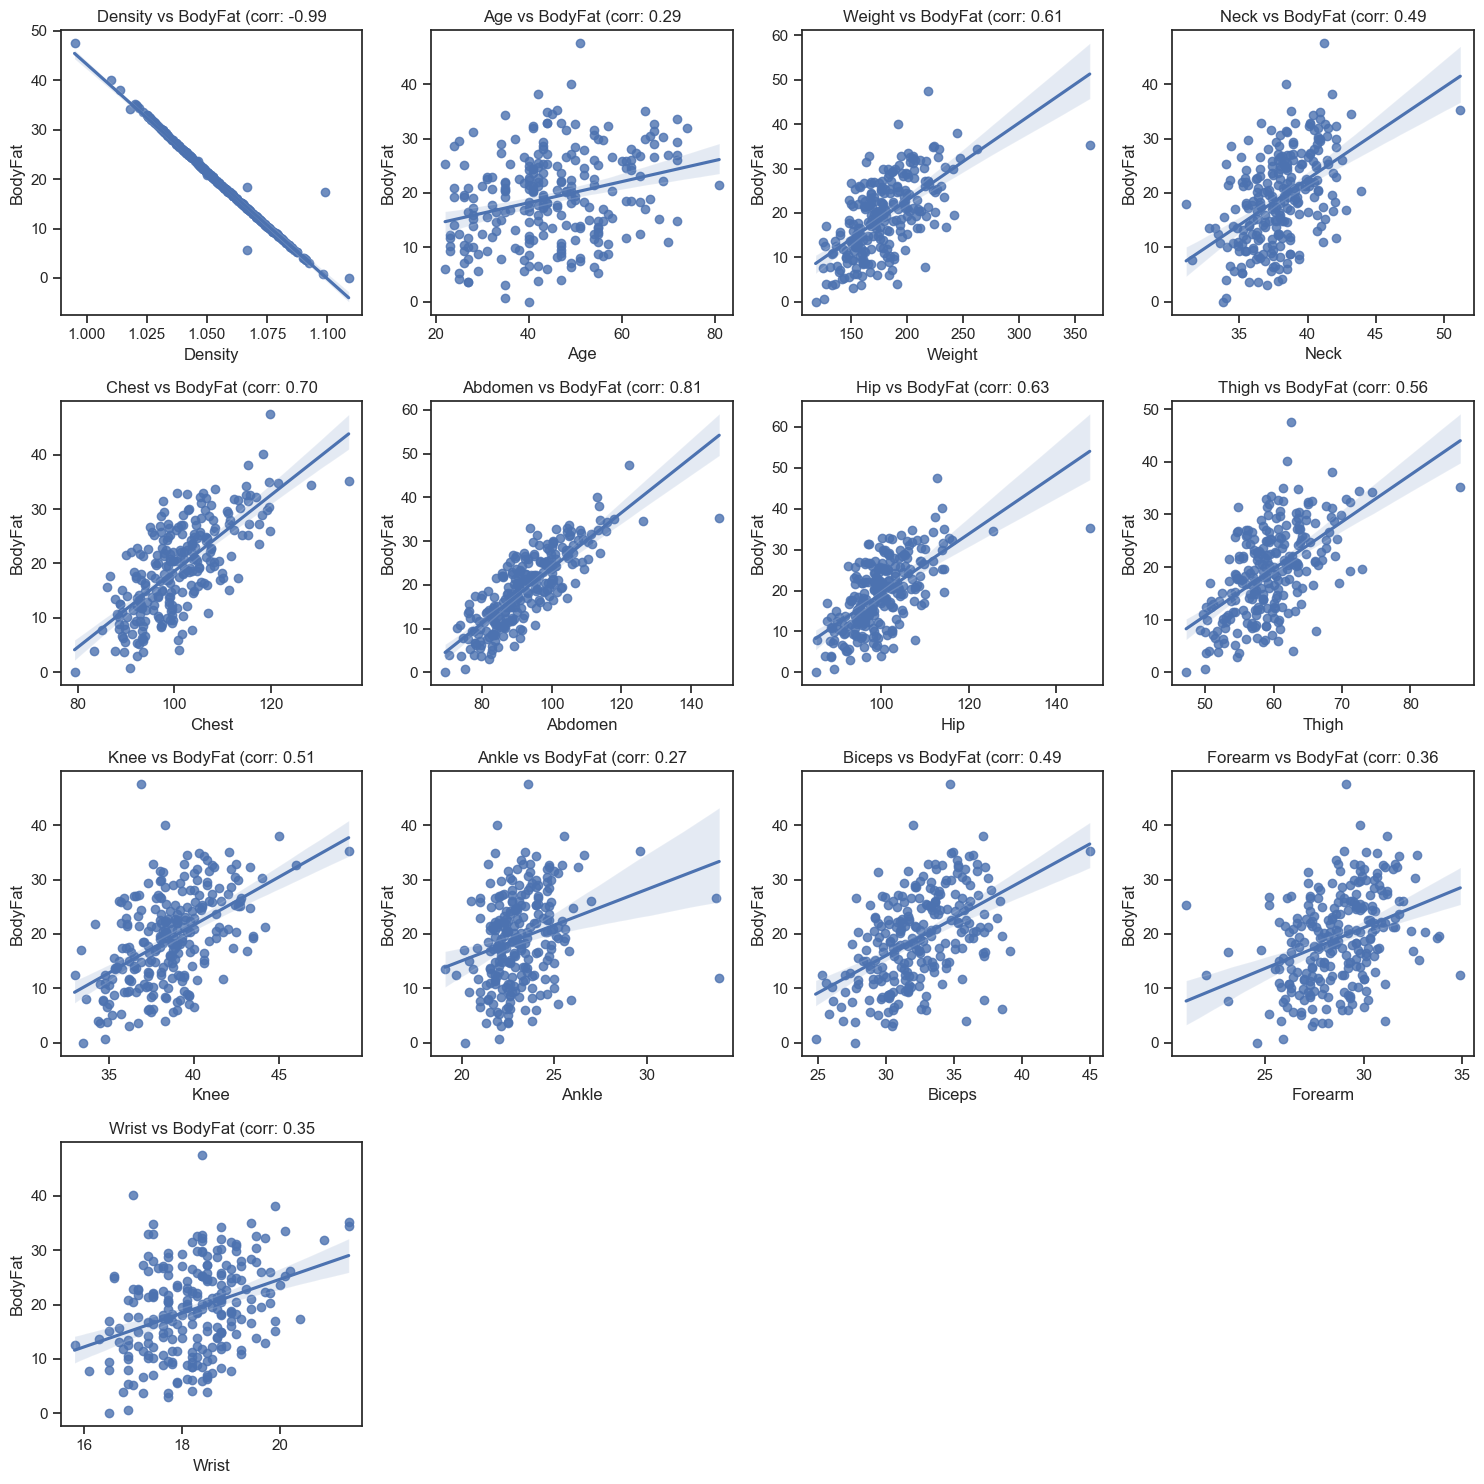

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)

cols = ['Density', 'Age', 'Weight', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, col in enumerate(cols):
    if col != 'BodyFat':
        sns.regplot(ax=axes[i // 4, i % 4], x=col, y='BodyFat', data=df)
        corr_val = df[[col, 'BodyFat']].corr().iloc[0, 1]
        axes[i // 4, i % 4].set_xlabel(col)
        axes[i // 4, i % 4].set_ylabel('BodyFat')
        axes[i // 4, i % 4].set_title(f'{col} vs BodyFat (corr: {corr_val:.2f}')

# Remove any empty plot boxes
for i in range(len(cols), 4 * 4):
    fig.delaxes(axes[i // 4, i % 4])

plt.tight_layout()
plt.show()


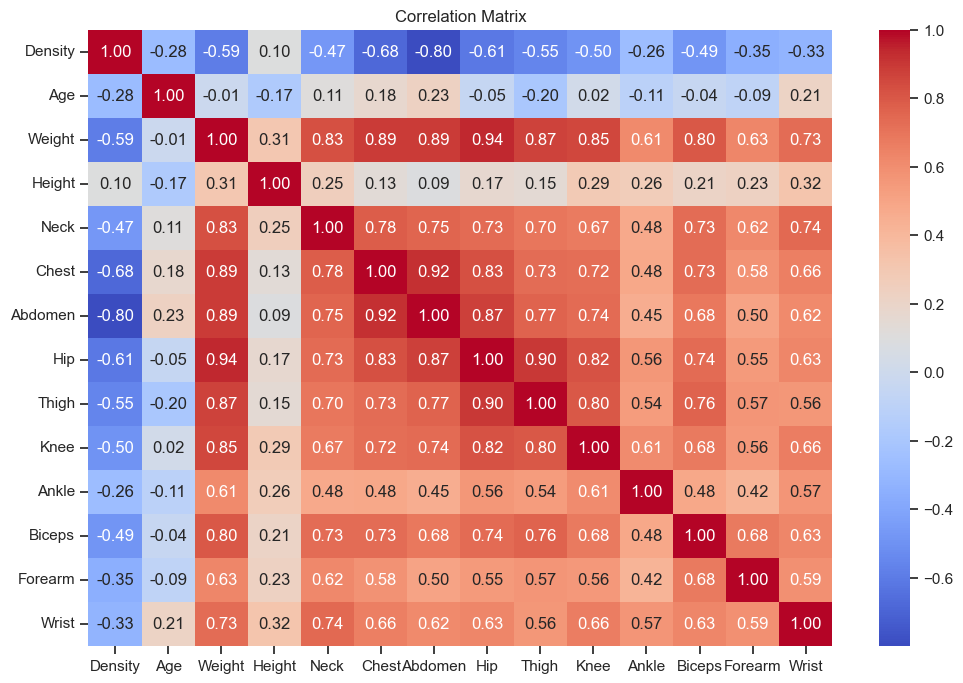

In [8]:
# correlation between columns of the dataframe
df_cor = df.drop('BodyFat', axis=1)
plt.figure(figsize=(12,8))
corr_matrix = df_cor.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt. show()

In [9]:
# reducing the number of columns based on correlation matrix
threshold = 0.85
corr_mask = (corr_matrix.abs() >= threshold) & (corr_matrix != 1)
cols_to_remove = corr_mask.any()[corr_mask.any () == True].index.tolist()
df_filtered = df.drop(cols_to_remove, axis=1)
df_filtered

,Density,BodyFat,Age,Height,Neck,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,67.75,36.2,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,72.25,38.5,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,66.25,34.0,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,72.25,37.4,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,71.25,34.4,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,67.00,34.9,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,69.75,40.9,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,66.00,38.9,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,70.50,38.9,22.7,30.5,29.4,19.8


In [10]:
# x consists of independent variables
x = df_filtered.drop(['BodyFat'],axis=1)
x

,Density,Age,Height,Neck,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,67.75,36.2,21.9,32.0,27.4,17.1
1,1.0853,22,72.25,38.5,23.4,30.5,28.9,18.2
2,1.0414,22,66.25,34.0,24.0,28.8,25.2,16.6
3,1.0751,26,72.25,37.4,22.8,32.4,29.4,18.2
4,1.0340,24,71.25,34.4,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...
247,1.0736,70,67.00,34.9,21.5,25.6,25.7,18.5
248,1.0236,72,69.75,40.9,23.2,35.2,28.6,20.1
249,1.0328,72,66.00,38.9,21.5,31.3,27.2,18.0
250,1.0399,72,70.50,38.9,22.7,30.5,29.4,19.8


In [11]:
# y consists of dependent variable or predictor in our case 'BodyFat'
y = df_filtered['BodyFat']
y

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
247    11.0
248    33.6
249    29.3
250    26.0
251    31.9
Name: BodyFat, Length: 252, dtype: float64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(201, 8)
(51, 8)
(201,)
(51,)


In [13]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
dtr = DecisionTreeRegressor(max_depth= 8, min_samples_split= 4, min_samples_leaf= 4)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=4)

In [15]:
rfr = RandomForestRegressor(n_estimators = 50,
                            max_depth = 8,
                            min_weight_fraction_leaf = 0.05,
                            max_features = 0.8,
                            random_state = 42)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, max_features=0.8,
                      min_weight_fraction_leaf=0.05, n_estimators=50,
                      random_state=42)

In [16]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [17]:
lr.predict([[1,20,67,38,22,29,24,17]])

C:\Users\zeesh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42.21156341])

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have trained a specific model (e.g., 'lr' for Linear Regression)
model = lr  # Replace 'lr' with the variable name of your trained model
model.fit(x_train, y_train)  # Training the model
predict_train = model.predict(x_train)  # Making predictions on the training data

# Calculate R2 and RMSE
error_score_train = r2_score(y_train, predict_train)
print("R2 error is:", error_score_train)

mse = mean_squared_error(y_train, predict_train)
rmse_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_train)


R2 error is: 0.975541891677019
Root Mean Squared Error: 1.2573252937074317


In [19]:
# training score
error_score_lr_train = r2_score(y_train, predict_train)
print("R2 error is: ", error_score_lr_train)
mse = mean_squared_error(y_train, predict_train)
rmse_lr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_train)

R2 error is:  0.975541891677019
Root Mean Squared Error: 1.2573252937074317


In [20]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have trained a specific model (e.g., 'lr' for Linear Regression) and made predictions
model = lr  # Replace 'lr' with the variable name of your trained model
model.fit(x_train, y_train)  # Training the model
predict_train = model.predict(x_train)  # Making predictions on the training data
predict_test = model.predict(x_test)  # Making predictions on the testing data

# Calculate R2 and RMSE for training data
error_score_lr_train = r2_score(y_train, predict_train)
print("R2 error for training data is:", error_score_lr_train)

mse_train = mean_squared_error(y_train, predict_train)
rmse_lr_train = np.sqrt(mse_train)
print('Root Mean Squared Error for training data:', rmse_lr_train)

# Calculate R2 and RMSE for testing data
error_score_lr_test = r2_score(y_test, predict_test)
print("R2 error for testing data is:", error_score_lr_test)

mse_test = mean_squared_error(y_test, predict_test)
rmse_lr_test = np.sqrt(mse_test)
print('Root Mean Squared Error for testing data:', rmse_lr_test)


R2 error for training data is: 0.975541891677019
Root Mean Squared Error for training data: 1.2573252937074317
R2 error for testing data is: 0.9790607787560998
Root Mean Squared Error for testing data: 1.3640749312404146


In [21]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have trained a Decision Tree Regressor model (dtr) and made predictions
dtr.fit(x_train, y_train)  # Training the Decision Tree Regressor model
predict_train_dtr = dtr.predict(x_train)  # Making predictions on the training data

# Calculate R2 and RMSE for training data
error_score_dtr_train = r2_score(y_train, predict_train_dtr)
print("R2 error for training data is:", error_score_dtr_train)

mse = mean_squared_error(y_train, predict_train_dtr)
rmse_dtr_train = np.sqrt(mse)
print('Root Mean Squared Error for training data:', rmse_dtr_train)

R2 error for training data is: 0.9882253508391287
Root Mean Squared Error for training data: 0.8723890547663329


In [22]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have trained a Decision Tree Regressor model (dtr) and made predictions
predict_test_dtr = dtr.predict(x_test)  # Making predictions on the testing data

# Calculate R2 and RMSE for testing data
error_score_dtr_test = r2_score(y_test, predict_test_dtr)
print("R2 error for testing data is:", error_score_dtr_test)

mse = mean_squared_error(y_test, predict_test_dtr)
rmse_dtr_test = np.sqrt(mse)
print('Root Mean Squared Error for testing data:', rmse_dtr_test)


R2 error for testing data is: 0.9410853419944457
Root Mean Squared Error for testing data: 2.288071782599108


In [23]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have trained a Random Forest Regressor model (rfr) and made predictions
predict_train_rfr = rfr.predict(x_train)  # Making predictions on the training data

# Calculate R2 and RMSE for training data
error_score_rfr_train = r2_score(y_train, predict_train_rfr)
print("R2 error for training data is:", error_score_rfr_train)

mse = mean_squared_error(y_train, predict_train_rfr)
rmse_rfr_train = np.sqrt(mse)
print('Root Mean Squared Error for training data:', rmse_rfr_train)


R2 error for training data is: 0.9791632855075582
Root Mean Squared Error for training data: 1.1605152207369323


In [24]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have trained a Random Forest Regressor model (rfr) and made predictions
predict_test_rfr = rfr.predict(x_test)  # Making predictions on the testing data

# Calculate R2 and RMSE for testing data
error_score_rfr_test = r2_score(y_test, predict_test_rfr)
print("R2 error for testing data is:", error_score_rfr_test)

mse = mean_squared_error(y_test, predict_test_rfr)
rmse_rfr_test = np.sqrt(mse)
print('Root Mean Squared Error for testing data:', rmse_rfr_test)


R2 error for testing data is: 0.9149508261501245
Root Mean Squared Error for testing data: 2.74911567696938


In [25]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have trained a Gradient Boosting Regressor model (gbr) and made predictions
predict_train_gbr = gbr.predict(x_train)  # Making predictions on the training data

# Calculate R2 and RMSE for training data
error_score_gbr_train = r2_score(y_train, predict_train_gbr)
print("R2 error for training data is:", error_score_gbr_train)

mse = mean_squared_error(y_train, predict_train_gbr)
rmse_gbr_train = np.sqrt(mse)
print('Root Mean Squared Error for training data:', rmse_gbr_train)


R2 error for training data is: 0.9951010206422864
Root Mean Squared Error for training data: 0.5627156906172873


In [26]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have trained a Gradient Boosting Regressor model (gbr) and made predictions
predict_test_gbr = gbr.predict(x_test)  # Making predictions on the testing data

# Calculate R2 and RMSE for testing data
error_score_gbr_test = r2_score(y_test, predict_test_gbr)
print("R2 error for testing data is:", error_score_gbr_test)

mse = mean_squared_error(y_test, predict_test_gbr)
rmse_gbr_test = np.sqrt(mse)
print('Root Mean Squared Error for testing data:', rmse_gbr_test)


R2 error for testing data is: 0.9510009062359859
Root Mean Squared Error for testing data: 2.086661430442402


In [27]:
import pandas as pd

# Create a DataFrame for the results
results = pd.DataFrame(columns=['Model', 'Training R2', 'Testing R2', 'Training RMSE', 'Testing RMSE'])

# Assuming you have calculated the metrics for each model
results.loc[0] = ['Linear Regression', error_score_lr_train, error_score_lr_test, rmse_lr_train, rmse_lr_test]
results.loc[1] = ['Decision Tree Regressor', error_score_dtr_train, error_score_dtr_test, rmse_dtr_train, rmse_dtr_test]
results.loc[2] = ['Random Forest Regressor', error_score_rfr_train, error_score_rfr_test, rmse_rfr_train, rmse_rfr_test]
results.loc[3] = ['Gradient Boosting Regressor', error_score_gbr_train, error_score_gbr_test, rmse_gbr_train, rmse_gbr_test]

# Print the results DataFrame
print(results)


                         Model  Training R2  Testing R2  Training RMSE  \
0            Linear Regression     0.975542    0.979061       1.257325   
1      Decision Tree Regressor     0.988225    0.941085       0.872389   
2      Random Forest Regressor     0.979163    0.914951       1.160515   
3  Gradient Boosting Regressor     0.995101    0.951001       0.562716   

   Testing RMSE  
0      1.364075  
1      2.288072  
2      2.749116  
3      2.086661  


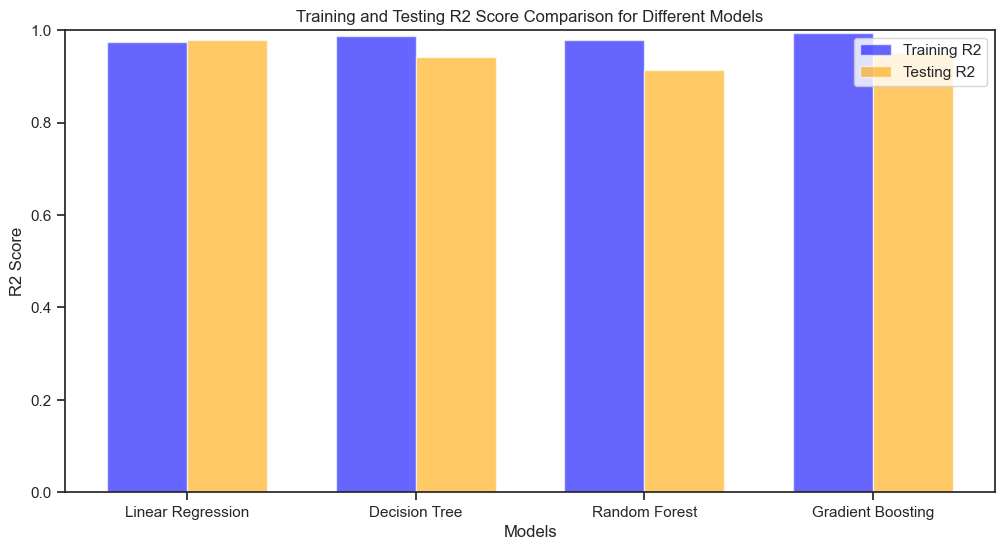

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Data for comparison
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
training_r2_scores = [error_score_lr_train, error_score_dtr_train, error_score_rfr_train, error_score_gbr_train]
testing_r2_scores = [error_score_lr_test, error_score_dtr_test, error_score_rfr_test, error_score_gbr_test]

# Define the width of each bar
bar_width = 0.35
index = np.arange(len(model_names))

# Create a grouped bar chart to compare training and testing R2 scores
plt.figure(figsize=(12, 6))
plt.bar(index, training_r2_scores, bar_width, label='Training R2', color='blue', alpha=0.6)
plt.bar(index + bar_width, testing_r2_scores, bar_width, label='Testing R2', color='orange', alpha=0.6)

# Set x-axis labels, y-axis label, and title
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Training and Testing R2 Score Comparison for Different Models')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()
plt.ylim(0, 1)  # Set the y-axis limits to 0-1 for R2 scores

plt.show()


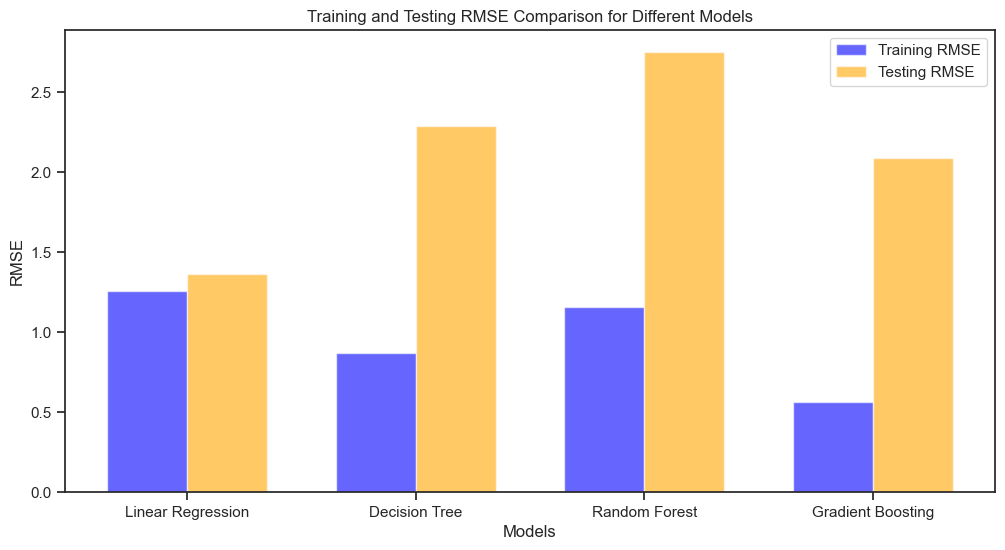

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Data for comparison
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
training_rmse = [rmse_lr_train, rmse_dtr_train, rmse_rfr_train, rmse_gbr_train]
testing_rmse = [rmse_lr_test, rmse_dtr_test, rmse_rfr_test, rmse_gbr_test]

# Define the width of each bar
bar_width = 0.35
index = np.arange(len(model_names))

# Create a grouped bar chart to compare training and testing RMSE
plt.figure(figsize=(12, 6))
plt.bar(index, training_rmse, bar_width, label='Training RMSE', color='blue', alpha=0.6)
plt.bar(index + bar_width, testing_rmse, bar_width, label='Testing RMSE', color='orange', alpha=0.6)

# Set x-axis labels, y-axis label, and title
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Training and Testing RMSE Comparison for Different Models')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()

plt.show()


In [30]:
pickle.dump(lr, open('bodyfat.pkl', 'wb'))
